# Rowan Morse: Pittsburgh Neighborhood Street Tree Data
- link to data set: https://data.wprdc.org/dataset/neighborhoods-with-snap-data/resource/bce22c26-9d3e-4e3f-8405-a35c4b7765b6

In [1]:
import pandas as pd
import geopandas
%matplotlib inline

In [12]:
data = pd.read_csv("snapdata.csv")


#### Reshaping data to only include Neighborhoods and Number of Street Trees

In [35]:
num_trees = data.groupby("Neighborhood_2010_HOOD").sum()['SNAP_All_csv___Street_Trees']
trees_sorted = num_trees.sort_values(ascending=False)
trees_sorted

Neighborhood_2010_HOOD
Squirrel Hill South    2263
Squirrel Hill North    1846
Shadyside              1601
South Side Flats       1337
Point Breeze           1092
                       ... 
Mt. Oliver                7
Fairywood                 6
Hays                      4
Arlington Heights         3
Glen Hazel                0
Name: SNAP_All_csv___Street_Trees, Length: 90, dtype: int64

#### Visualization of number of street trees in each Pittsburgh Neighborhood

<Axes: >

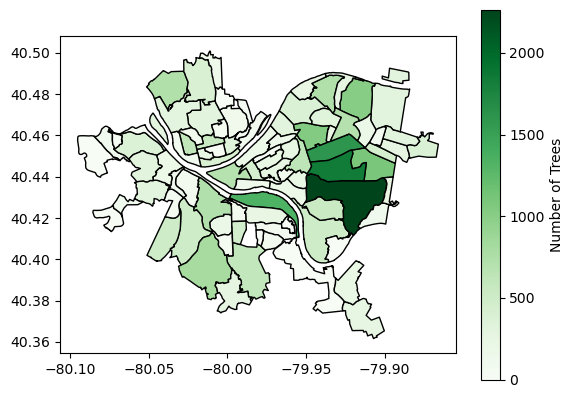

In [32]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
trees_map = neighborhoods.merge(num_trees, how='left', left_on='hood', right_on='Neighborhood_2010_HOOD')
trees_map[['hood','SNAP_All_csv___Street_Trees','geometry']].head()
trees_map.plot(column='SNAP_All_csv___Street_Trees', # set the data to be used for coloring
               cmap='Greens',              # choose a color palette
               edgecolor="Black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Trees"}, # label the legend
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

#### Bar Chart displaying the top 5 Pittsburgh Neighborhoods with most trees 

Text(0, 0.5, 'Number of Street Trees')

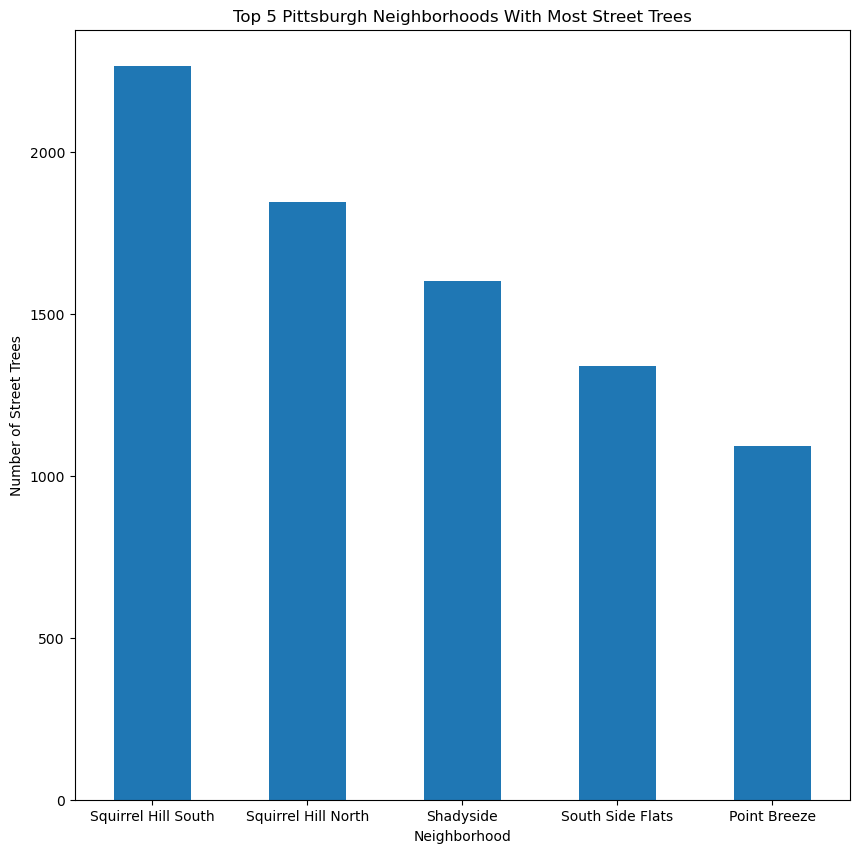

In [59]:
top_5 = trees_sorted.head(5)
tree_bar = top_5.plot.bar(rot=0,figsize = (10,10))
tree_bar.set_title('Top 5 Pittsburgh Neighborhoods With Most Street Trees')
tree_bar.set_xlabel('Neighborhood')
tree_bar.set_ylabel('Number of Street Trees')